In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from football_sim.football_sim import *
import os
plt.rcParams['figure.figsize']=[16,9]

In [2]:
calibrator = Calibrator('calibration.pkl',redo=False)
calibrator.create_all_teams()
calibrator.process_data(verbose=True)
teams=calibrator.teams
calibrator.get_current_results('BPL',only_done=True).tail(10)

calibration.pkl  exists.
file exists, loading
2263


,Date,League,HomeTeam,AwayTeam,FTHG,FTAG,xg1,xg2,nsxg1,nsxg2
17976,2019-02-06,BPL,Everton,Manchester City,0,2,0.13,2.94,0.71,2.11
18019,2019-02-09,BPL,Fulham,Manchester United,0,3,2.13,2.11,1.57,2.27
18054,2019-02-09,BPL,Watford,Everton,1,0,1.43,0.73,1.36,1.17
18058,2019-02-09,BPL,Crystal Palace,West Ham United,1,1,2.42,1.59,2.40,1.49
18065,2019-02-09,BPL,Liverpool,AFC Bournemouth,3,0,2.52,0.42,2.59,0.91
18067,2019-02-09,BPL,Huddersfield Town,Arsenal,1,2,1.26,1.70,0.68,1.10
18068,2019-02-09,BPL,Southampton,Cardiff City,1,2,1.72,0.48,1.40,1.04
18088,2019-02-09,BPL,Brighton and Hove Albion,Burnley,1,3,1.41,1.84,1.92,0.77
18134,2019-02-10,BPL,Tottenham Hotspur,Leicester City,3,1,1.18,3.18,1.20,1.77
18155,2019-02-10,BPL,Manchester City,Chelsea,6,0,4.08,1.02,1.61,2.09


In [3]:
print(calibrator.raw_data['League'].unique())
calibrator.raw_data.loc[calibrator.raw_data['League']=='ELC'];

['NT' 'SA' 'USL' 'MLS' 'NWSL' 'DS' 'BSA' 'MPDTA' 'SRSL' 'FL2' 'BJL' 'ATB'
 'RPL' 'CSL' 'JJL' 'G2B' 'ELC' 'ELO' 'SAAPL' 'ELT' 'SP' 'DE' 'TTSL' 'FL1'
 'BPL' 'PL' 'APD' 'SSD' 'SPD' 'ISA' 'GB' 'ISB' 'GSL' 'UCL' 'UEL' 'AA'
 'MPDTC']


In [4]:
Teams=dict()
League=dict()

In [5]:
country='UEFA'
home_advantage=[0,1]
print(home_advantage)
Teams[country]={x:teams[x] for x in teams if x in ['FL1', 'BPL', 'SPD', 'ISA', 'GB', 'DE', 'PL', 'RPL']}
League[country]=Season(Teams[country],home_advantage=home_advantage,nr_cl=2,nr_degr=4)

#League[country].process_current_results(calibrator.get_current_results(country))
#League[country].simulate_season(n_scenarios=1000000)
df=League[country].season_report()
df['Rating']=df['Off']*(1-df['Deff'])
df

[0, 1]
simulation not yet done, simulating
simulation not yet processed, processing


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr,Rating
GB,0,26.4,18,34,5,1,45.28,73.17,5.16,0.33,6.70,3.4572
SPD,0,25.4,18,33,5,1,35.27,65.35,4.24,0.28,9.15,3.0528
BPL,0,20.0,12,28,8,1,6.83,19.86,3.36,0.33,41.93,2.2512
ISA,0,19.2,11,27,8,1,5.04,15.90,3.02,0.31,48.80,2.0838
PL,0,18.2,11,26,8,2,3.78,12.25,3.43,0.38,56.71,2.1266
DE,0,16.2,9,24,8,2,1.98,6.33,4.01,0.51,73.23,1.9649
RPL,0,15.1,8,23,8,3,1.08,4.00,3.22,0.45,79.46,1.7710
FL1,0,14.3,7,22,8,3,0.74,3.14,3.49,0.51,84.02,1.7101


In [14]:
for country in ['FL1', 'BPL', 'SPD', 'ISA', 'GB', 'DE', 'PL', 'RPL','ELC']:
    lH,pH=calibrator.teams[country+'Home'].means()
    lA,pA=calibrator.teams[country+'Away'].means()
    home_advantage=np.array([lH-lA,pH/pA])
    Teams[country]= calibrator.get_teams_for_league(country)
    League[country]=Season(Teams[country],home_advantage=home_advantage,nr_cl=4)
    League[country].process_current_results(calibrator.get_current_results(country))
    # home_advantage=np.array([0,1])
    

In [15]:
PremierLeague=League['BPL']
PremierLeague.simulate_season(n_scenarios=int(1e5))

,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Liverpool,65,94.1,88,99,2,1,61.40,100.00,5.42,0.17,0.00
Manchester City,65,92.2,86,98,2,1,37.87,100.00,6.84,0.24,0.00
Tottenham Hotspur,60,83.2,76,90,3,2,0.73,99.23,4.97,0.30,0.00
Manchester United,51,71.5,64,78,6,4,0.00,42.65,4.93,0.39,0.00
Arsenal,50,70.5,63,78,6,4,0.00,33.22,4.91,0.44,0.00
Chelsea,50,69.8,63,77,6,4,0.00,24.70,3.97,0.36,0.00
Wolverhampton,38,58.1,51,66,9,6,0.00,0.19,3.38,0.37,0.00
Watford,37,53.1,46,60,12,7,0.00,0.00,3.20,0.40,0.00
Leicester City,32,49.5,42,57,14,7,0.00,0.00,2.85,0.37,0.02
West Ham United,33,48.5,42,55,14,8,0.00,0.00,2.94,0.43,0.04


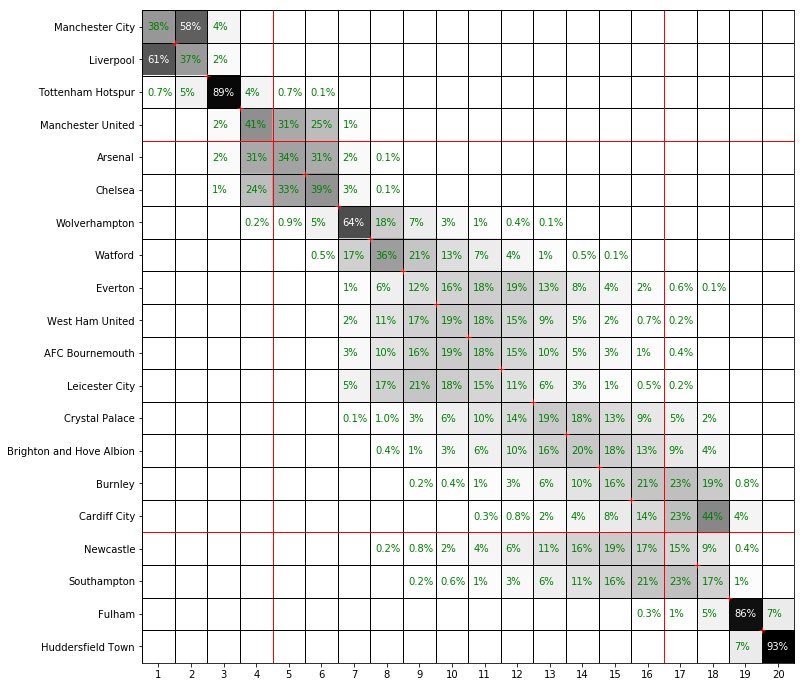

In [16]:
country='BPL'
League[country].process_simulation(max_date=pd.Timestamp('2019-09-24'),verbose=False)
team_names,T=League[country].probability_grid()
League[country].season_report()

24.237


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Liverpool,65,93.6,88,99,2,1,61.68,100.00,5.42,0.17,0.00
Manchester City,65,91.7,86,96,2,1,37.36,100.00,6.84,0.24,0.00
Tottenham Hotspur,60,83.2,76,90,4,2,0.96,98.45,4.97,0.30,0.00
Manchester United,51,77.0,75,81,5,3,0.00,89.18,4.93,0.39,0.00
Arsenal,50,69.9,63,77,6,4,0.00,7.59,4.91,0.44,0.00
Chelsea,50,69.2,62,76,6,5,0.00,4.79,3.97,0.36,0.00
Wolverhampton,38,57.6,50,65,9,6,0.00,0.00,3.38,0.37,0.00
Watford,37,52.7,46,59,12,7,0.00,0.00,3.20,0.40,0.00
Leicester City,32,49.5,42,57,13,7,0.00,0.00,2.85,0.37,0.02
AFC Bournemouth,33,48.5,42,56,14,8,0.00,0.00,3.48,0.50,0.03


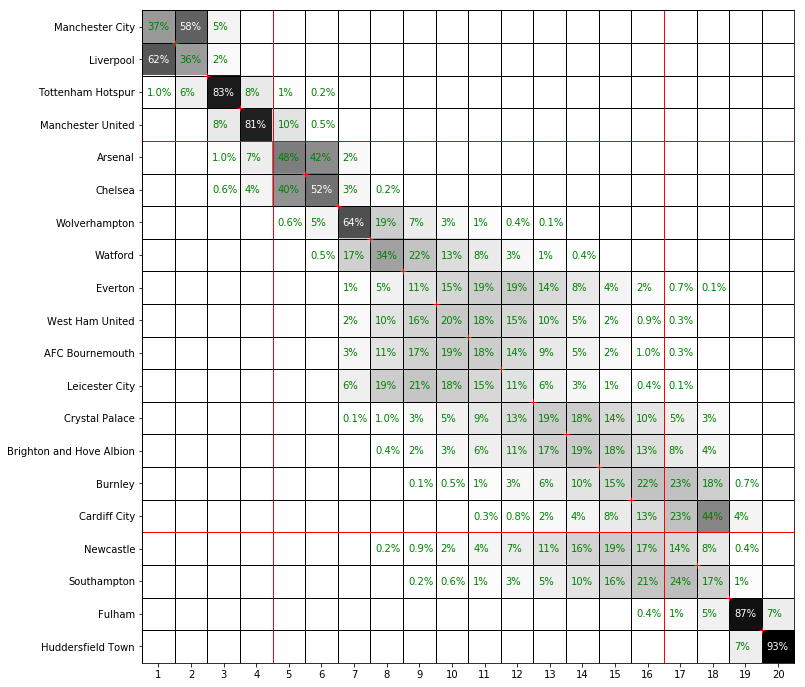

In [9]:
PremierLeague=League['BPL']
PremierLeague.process_simulation(max_date=pd.Timestamp('2019-07-24'),verbose=False)
team_name='Manchester United'
ind = np.ones(PremierLeague.place_per_team.shape[1]).astype(bool)
match_id = PremierLeague.matches_to_sim['Arsenal v Manchester United']['id']
ind = ind&(PremierLeague.simulated_home_goals[match_id]<PremierLeague.simulated_away_goals[match_id])
match_id = PremierLeague.matches_to_sim['Manchester United v Chelsea']['id']
ind = ind |( PremierLeague.simulated_home_goals[match_id]>PremierLeague.simulated_away_goals[match_id])

#ind = np.ones(PremierLeague.place_per_team.shape[1]).astype(bool)
#ind = ind & ( PremierLeague.simulated_home_goals[match_id]>PremierLeague.simulated_away_goals[match_id])
#ind = ind & ( PremierLeague.simulated_home_goals[match_id]<PremierLeague.simulated_away_goals[match_id])
#ind = ind &(PremierLeague.place_per_team[PremierLeague.team_id['Liverpool'],:]>1)


#ind = (PremierLeague.place_per_team[PremierLeague.team_id['Manchester United'],:]<=6)
match_id = PremierLeague.matches_to_sim['Manchester United v Liverpool']['id']
ind = (PremierLeague.simulated_home_goals[match_id]>PremierLeague.simulated_away_goals[match_id])

ind = PremierLeague.points_per_team[PremierLeague.team_id['Manchester United'],:]>=PremierLeague.current_points['Manchester United']+12*2
print(100*ind.sum()/ind.size)
team_names,T=PremierLeague.probability_grid(ind=ind)
PremierLeague.season_report(ind=ind)


In [ ]:
PremierLeague=League['BPL']
_,fig=PremierLeague.what_if(PremierLeague.matches_to_sim['Manchester United v Liverpool'],ref_team=teams['Manchester United'])

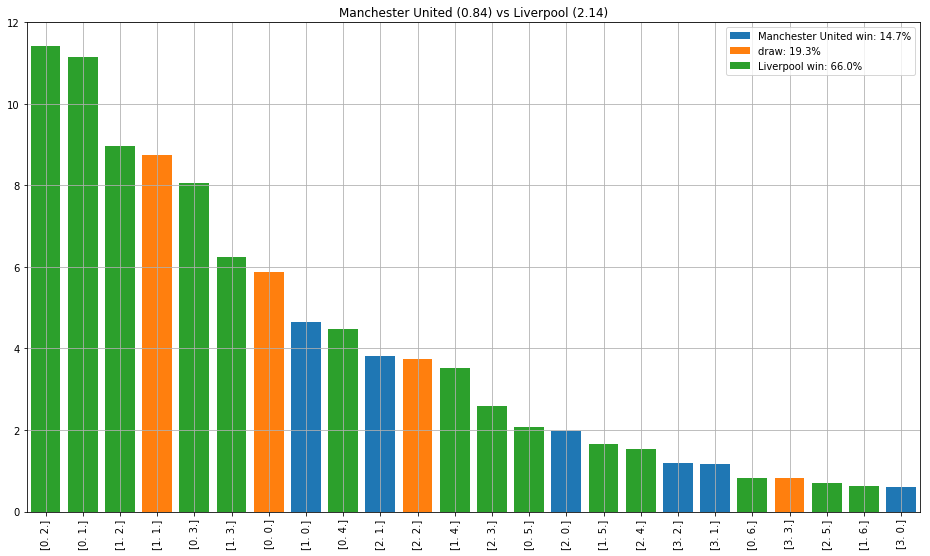

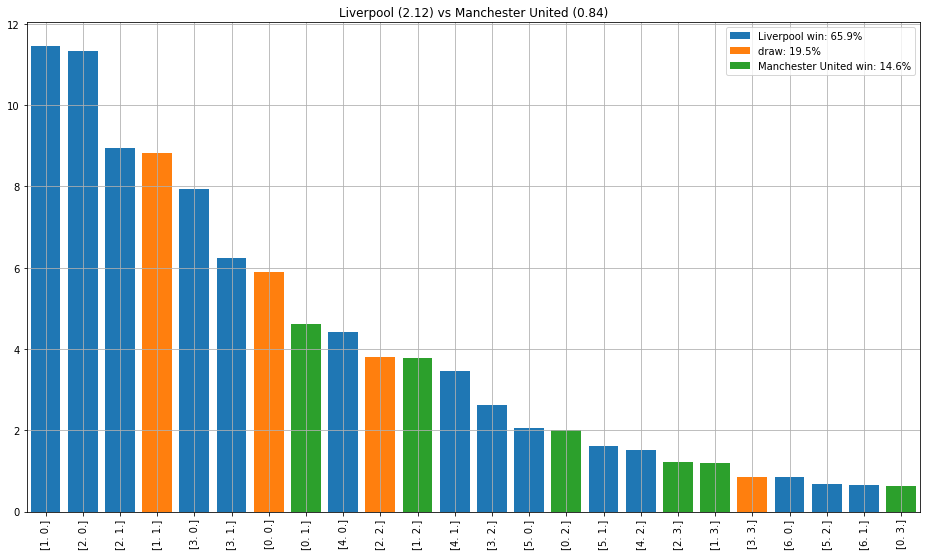

In [16]:
team1=teams['Manchester United']
#team1=teams['Manchester City']
team2=teams['Brighton and Hove Albion']
team2=teams['Chelsea']
team2=teams['Liverpool']
#team2=teams['Leicester City']
fig=plt.figure(1)
home_advantage=np.array([lH-lA,pH/pA])
home_advantage=np.array([0,1])
team1.outcomes_vs(team2,home_advantage=home_advantage)
fig.set_size_inches(16,9)
fig=plt.figure(2)
team2.outcomes_vs(team1,home_advantage=home_advantage)
fig = plt.gcf()
fig.set_size_inches(16,9)

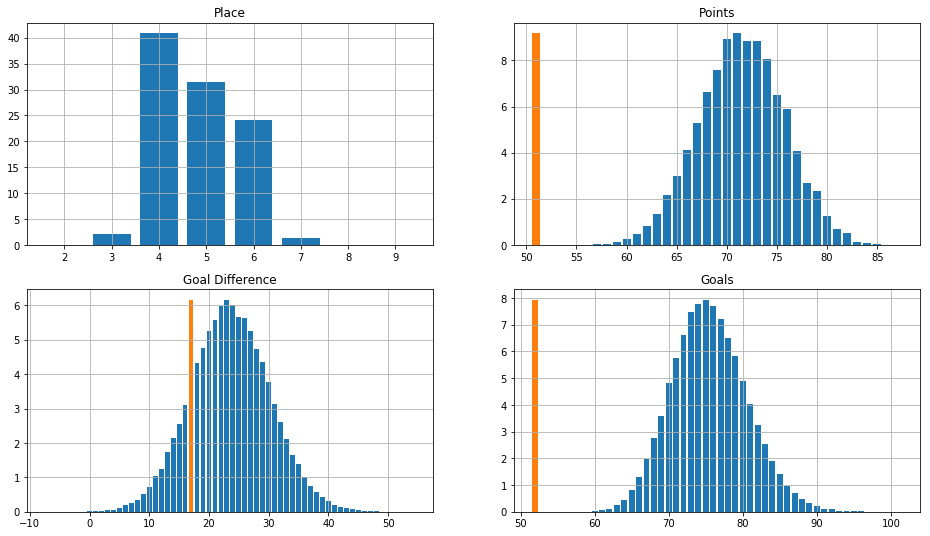

In [22]:
PremierLeague=League['BPL']
PremierLeague.team_report(teams['Manchester United'])

# Most important matches

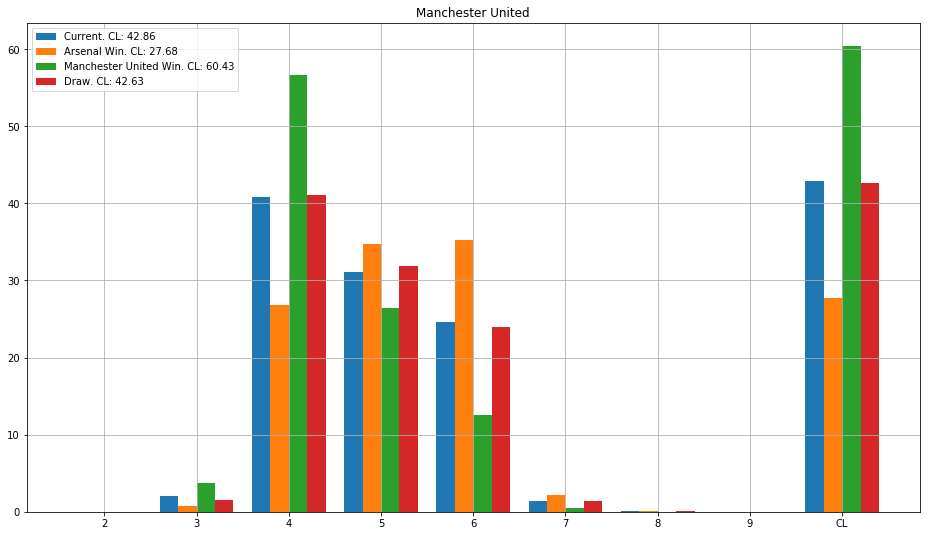

In [22]:
imp=[]
ref_team=teams['Manchester United']
# ref_team='Liverpool'
# ref_team='Arsenal'
matches=[]
PremierLeague=League['BPL']
for x,_match_to_sim in PremierLeague.matches_to_sim.items():
    matches.append(x)
    pcl,_=PremierLeague.what_if(_match_to_sim,ref_team=ref_team,show_plot=False,place=4,or_better=True)
    #imp.append(pcl.max()/pcl.min())
    #imp.append(pcl.std())
    imp.append(np.abs(pcl[1:-1]-pcl[0]).mean())
    #imp.append(1/pcl.min())
imp=np.array(imp)
matches=np.array(matches)
the_match=matches[imp.argmax()]
pcl,fig=PremierLeague.what_if(PremierLeague.matches_to_sim[the_match],ref_team=ref_team)

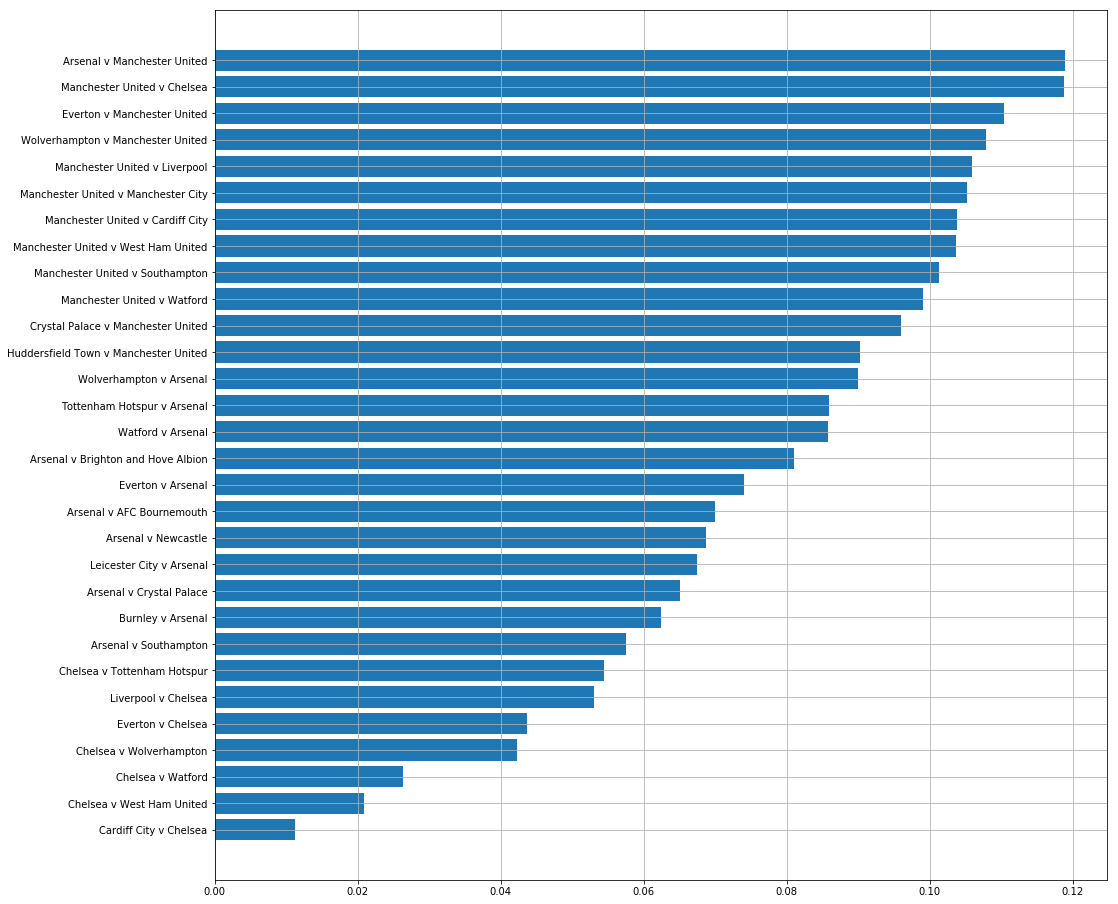

In [23]:
i_sort=(imp).argsort()
#matches=matches[i_sort]
#imp=imp[i_sort]
xx=np.arange(30)
plt.barh(xx,imp[i_sort][xx])
plt.yticks(xx,matches[i_sort][-xx.size:],rotation=0);
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(16,16)

1.7071233333333333

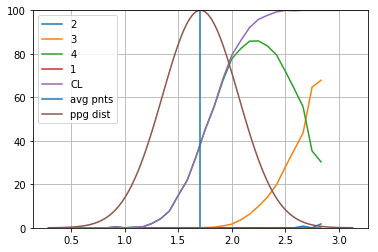

In [29]:
team_name='Manchester United'
#team_name='Liverpool'
PremierLeague=League['BPL']
#team_name='Tottenham'
#team_name='Chelsea'
#team_name='Liverpool'
i=PremierLeague.team_id[team_name]
ind=PremierLeague.place_per_team[i,:]<=4
tmp=[PremierLeague.matches_to_sim[x] for x in PremierLeague.matches_to_sim ]
n=len([x for x in tmp if x['Home']==team_name or x['Away']==team_name])
#pnts=PremierLeague.points_per_team[i,ind]-PremierLeague.current_points['Man United']
pnts=PremierLeague.points_per_team[i,:]-PremierLeague.current_points[team_name]
plc=PremierLeague.place_per_team[i,:]

nrpnts=np.arange(5,3*n+1)
p=np.zeros([nrpnts.shape[0],6])
p[:]=np.nan
for jj in range(nrpnts.shape[0]):
    ind=pnts==nrpnts[jj]
    if ind.any():
        p[jj,0]=(plc[ind]==2).sum()/ind.sum()
        p[jj,1]=(plc[ind]==3).sum()/ind.sum()
        p[jj,2]=(plc[ind]==4).sum()/ind.sum()
        p[jj,3]=(plc[ind]<=4).sum()/ind.sum()
        p[jj,4]=(plc[ind]==1).sum()/ind.sum()
    
ind = np.isnan(p[:,3])
p[ind,3]=np.interp(nrpnts[ind],nrpnts[~ind],p[~ind,3])

plt.plot(nrpnts/n,100*p[:,0],label='2')
plt.plot(nrpnts/n,100*p[:,1],label='3')
plt.plot(nrpnts/n,100*p[:,2],label='4')
plt.plot(nrpnts/n,100*p[:,4],label='1')
plt.plot(nrpnts/n,100*p[:,3],label='CL')
plt.grid(True)
plt.ylim([0,100])
#plt.xlabel([0,3])
mu=pnts.mean()/n
plt.axvline(mu,label='avg pnts')
s=(pnts/n).std()
from scipy.stats import norm
x=np.linspace(mu-4*s,mu+4*s,100)
y=norm.pdf((x-mu)/s)
y=100*y/y.max()
plt.plot(x,y,label='ppg dist')
plt.legend()
pnts.mean()/n

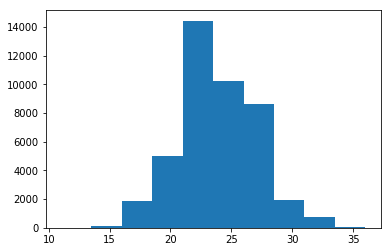

In [30]:
team_name='Manchester United'
#team_name='Liverpool'
PremierLeague=League['BPL']
#team_name='Tottenham'
#team_name='Chelsea'
#team_name='Liverpool'
i=PremierLeague.team_id[team_name]
tmp=[PremierLeague.matches_to_sim[x] for x in PremierLeague.matches_to_sim ]
n=len([x for x in tmp if x['Home']==team_name or x['Away']==team_name])
ind=PremierLeague.place_per_team[i,:]<=4
plt.hist((PremierLeague.points_per_team[i,ind]-PremierLeague.current_points[team_name]),10);

In [31]:
def points(x):
    return 3*x[0]+x[1]

def prob(x):
    return np.round(100*np.interp(points(x),nrpnts,p[:,3]),2)
    

[(nW,nD,n-nW-nD,points((nW,nD)),prob((nW,nD))) for nW in range(n+1) for nD in range(n+1) if n-nW-nD>=0 and prob((nW,nD))>=90]

[(7, 5, 0, 26, 92.13),
 (8, 2, 2, 26, 92.13),
 (8, 3, 1, 27, 95.88),
 (8, 4, 0, 28, 97.74),
 (9, 0, 3, 27, 95.88),
 (9, 1, 2, 28, 97.74),
 (9, 2, 1, 29, 99.28),
 (9, 3, 0, 30, 100.0),
 (10, 0, 2, 30, 100.0),
 (10, 1, 1, 31, 99.81),
 (10, 2, 0, 32, 100.0),
 (11, 0, 1, 33, 100.0),
 (11, 1, 0, 34, 100.0),
 (12, 0, 0, 36, 100.0)]